In [1]:
#Load required Libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression,RidgeCV
from sklearn.model_selection import *
from sklearn.preprocessing import *
from sklearn.svm import SVR
from sklearn.decomposition import *
from sklearn.metrics import mean_squared_error,make_scorer
import matplotlib.pyplot as plt


In [2]:
#Load the normalized data from previous steps with HDI
df = pd.read_pickle('../normalDataFromAngeloWithHDI.pickle')
df.head()

,State,HDI,awards_per_value,exp_award_value,High_School_Fee,Elementary_School_Fee,Colleges_universities_per_1000000,Junior_colleges_per_1000000,Prof_schools_per_1000000,Intensive_top_230_score,...,Property_crime,Burglary,Theft,Motor_Vehicle_theft,Per_capita_income,Price_2018_Studio,Price_2018_1br,Price_2018_2br,Price_2018_3br,Price_2018_4br
1,alabama,0.882,19.514493,63013.173913,7718.0,6388.0,8.636111,7.402381,3.289947,75.257541,...,2947.8,700.5,2006.3,241.1,38215.0,605.416667,659.000000,800.666667,1069.666667,1244.333333
2,alaska,0.942,18.414286,141431.142857,6118.0,7544.0,8.087409,1.347901,2.695803,39.089142,...,3353.0,546.3,2394.7,412.1,54430.0,814.333333,930.500000,1190.333333,1682.166667,2019.500000
3,arizona,0.912,25.563492,47830.888889,17339.0,6283.0,6.636781,6.203947,6.059670,30.154070,...,2978.4,544.4,2168.1,265.8,39955.0,701.000000,828.000000,1046.000000,1512.333333,1754.416667
4,arkansas,0.882,21.970833,51132.479167,6680.0,4698.0,8.700750,8.700750,10.708616,32.125848,...,3268.6,795.5,2233.6,239.4,39171.0,524.666667,571.166667,721.416667,977.583333,1144.833333
5,california,0.934,22.771429,63022.202857,19317.0,11363.0,6.726112,4.866240,6.089169,78.063660,...,2553.0,479.8,1623.0,450.3,54800.0,1212.333333,1426.333333,1818.916667,2519.250000,2926.333333


We remove the State names and set the HDI values as the output `y` and the remaining features as the data `X`.

In [3]:

States = df.State.tolist()
X = df.drop(["State", "HDI"], axis = 1)
y = df.HDI
X.head()

,awards_per_value,exp_award_value,High_School_Fee,Elementary_School_Fee,Colleges_universities_per_1000000,Junior_colleges_per_1000000,Prof_schools_per_1000000,Intensive_top_230_score,Life_Expectancy,mc_donalds_per_100k,...,Property_crime,Burglary,Theft,Motor_Vehicle_theft,Per_capita_income,Price_2018_Studio,Price_2018_1br,Price_2018_2br,Price_2018_3br,Price_2018_4br
1,19.514493,63013.173913,7718.0,6388.0,8.636111,7.402381,3.289947,75.257541,74.813987,5.0,...,2947.8,700.5,2006.3,241.1,38215.0,605.416667,659.000000,800.666667,1069.666667,1244.333333
2,18.414286,141431.142857,6118.0,7544.0,8.087409,1.347901,2.695803,39.089142,78.915541,4.2,...,3353.0,546.3,2394.7,412.1,54430.0,814.333333,930.500000,1190.333333,1682.166667,2019.500000
3,25.563492,47830.888889,17339.0,6283.0,6.636781,6.203947,6.059670,30.154070,78.364742,4.1,...,2978.4,544.4,2168.1,265.8,39955.0,701.000000,828.000000,1046.000000,1512.333333,1754.416667
4,21.970833,51132.479167,6680.0,4698.0,8.700750,8.700750,10.708616,32.125848,75.626900,5.8,...,3268.6,795.5,2233.6,239.4,39171.0,524.666667,571.166667,721.416667,977.583333,1144.833333
5,22.771429,63022.202857,19317.0,11363.0,6.726112,4.866240,6.089169,78.063660,80.231014,3.3,...,2553.0,479.8,1623.0,450.3,54800.0,1212.333333,1426.333333,1818.916667,2519.250000,2926.333333


In [4]:
#Checking statistics for the features and the output.
df.describe()

,HDI,awards_per_value,exp_award_value,High_School_Fee,Elementary_School_Fee,Colleges_universities_per_1000000,Junior_colleges_per_1000000,Prof_schools_per_1000000,Intensive_top_230_score,Life_Expectancy,...,Property_crime,Burglary,Theft,Motor_Vehicle_theft,Per_capita_income,Price_2018_Studio,Price_2018_1br,Price_2018_2br,Price_2018_3br,Price_2018_4br
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,...,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,0.922608,22.971176,66598.569680,13727.039216,7746.490196,10.322356,6.099607,7.190986,106.032031,78.262064,...,2504.064706,470.958824,1803.998039,229.107843,47125.901961,744.338235,848.303922,1054.060458,1421.009804,1657.477124
std,0.022469,2.215785,19730.887539,7600.441232,3377.477398,5.329495,2.884458,3.339187,156.409183,1.705511,...,674.554242,162.708761,494.491131,114.559621,7462.990763,220.293414,243.846978,293.103948,393.657178,475.658306
min,0.867000,18.414286,45130.875000,5375.000000,2550.000000,1.707939,0.000000,1.707939,11.564398,74.813987,...,1512.900000,201.700000,1135.200000,45.100000,34752.000000,486.333333,564.333333,721.416667,968.166667,1098.416667
25%,0.909500,21.887917,51720.242949,8107.500000,5089.500000,7.268301,4.382072,4.740343,45.121019,76.861272,...,1945.300000,342.250000,1436.200000,150.950000,42031.500000,564.541667,654.041667,821.791667,1100.250000,1261.708333
50%,0.927000,23.519917,60872.722222,11149.000000,7750.000000,8.748948,5.777315,6.714499,71.888278,78.546753,...,2586.600000,431.400000,1832.300000,220.800000,45733.000000,693.500000,783.833333,969.500000,1285.083333,1463.250000
75%,0.940000,24.451859,72419.318470,16128.000000,9421.000000,12.547509,7.396813,9.417573,99.102824,79.528299,...,2949.650000,561.100000,2060.850000,273.200000,50332.000000,864.083333,975.541667,1210.750000,1664.250000,1952.166667
max,0.959000,26.992614,141431.142857,33893.000000,20047.000000,32.020801,15.371451,16.929696,1111.323165,81.314894,...,4802.900000,830.400000,4019.800000,564.300000,70167.000000,1397.583333,1468.333333,1818.916667,2519.250000,2926.333333


Note that the features have different ranges which may distort our regression techniques. To overcome this, we need to perform some kind of normalization or scaling. We perform a MinMax Scaling (from sklearn) on our data input `X` to scale all features between `[0,1]`. Further, the true HDI values have a very small range and standard deviation, this means that even a model which predicts just a constant value equal to the mean will have a small overall Mean Square Error. To overcome this and make our model evaluation more realistic, we scale the outputs `y` to `[0,1]`. Further, we store the scalers as we will need to invert the predict values for our models back to true HDI range.

In [5]:
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_x.fit_transform(X.values)
Y_scaled = scaler_y.fit_transform(y.values.reshape(-1,1))

# Prediction Models

We use Linear Regression, Ridge Regression and Support Vector regression from the `sklearn` package as our primary models. Note that for linear and ridge regression, we will also cover the case when the features have been additionally normalized. We define certain parameters which we keep constant throughout all our analysis -- We take 5-fold cross-validation and we use validation mean square error of the predicted HDI rescaled back to `[0,1]` with the true HDI values as our main metric to compare different models. Further, we also use polynomial augmentation on the input data to obtain predictions on models in `linRegModels`. We do not use polynomial augmentation with the SVM since we do a hyperparameter search for the kernel which has polynomial as a possible choice. 

We define certain helper functions for these models. These are described below -
- **linRegModels** : 
The functions `linRegModels` implements `LinearRegression` and `RidgeCV` routines from the `sklearn` package. We further use `cross_val_predict` and `mean_squared_error` to obtain the validation MSE for each of the models. For ridge regression, `alpha` is a hyperparameter. So, we use the `RidgeCV` function to obtain the model with the best `alpha`, where the parameter grid for `alpha` goes from 0.01 to 1 with 0.01 difference. On the model with best `alpha`, we again use `cross_val_predict` to obtain 5-fold validation MSE. The function returns the MSE values for each of these models. Further, we use `LinearRegression` and `RidgeCV` with attribute `normalize=True` to obtain results after the data has been renormalized. After predicting the HDI in the current scale, we rescale it back to  `[0,1]` using the scaling parameters used for scaling the true HDI values. The MSE is calculated between these rescaled predictions and the true HDI values.

- **SVRModel** : 
We use the `SVR` method as our regressor and the `GridSearchCV` method for hyper parameter tuning. The hyperparameters are the kernel type ( rbf, linear, sigmoid, polynomial) and the parameter C (this ranges from exp(-6) to exp(6) with a difference of 1 in a geometric fashion). We again use 5-fold CV to get the best estimator and then use `cross_val_predict` and subsequent scaling as described in previous function followed by calculating the MSE with the true HDI.

- **polyfeat** : 
This function uses `PolynomialFeatures` method from `sklearn` to produce all the polynomial combinations for the features. Here, we limit the degree of the polynomial features to be 2, to prevent exploding the number of features, which implies that our new features would contain the original features and all possible  products of pairs of features for each datapoint.

In [6]:
def linRegModels(X,Y_scaled,scaler_y,Y):
    #Define linear regression model
    linReg = LinearRegression()
    #5-fold cross val predict to obtain predicted scaled HDI values
    Y_pred_scaled = cross_val_predict(linReg,X,Y_scaled,cv=5)
    #rescale HDI values using previous scaler
    Y_pred_linreg = scaler_y.inverse_transform(Y_pred_scaled)
    #Obtain MSE of rescaled values with original HDI
    MSELinReg = mean_squared_error(Y_pred_linreg,Y)

    #Define Linear Regression Model but with normalization of input
    linRegNorm = LinearRegression(normalize=True)
    #5-fold cross val predict to obtain predicted scaled HDI values
    Y_pred_scaled = cross_val_predict(linRegNorm,X,Y_scaled,cv=5)
    #rescale HDI values using previous scaler
    Y_pred_linreg_norm = scaler_y.inverse_transform(Y_pred_scaled)
    #Obtain MSE of rescaled values with original HDI
    MSELinRegNormalized = mean_squared_error(Y_pred_linreg_norm,Y)
    
    #Define hyperparameter values for alpha
    alphas = np.arange(0.01,1,0.01)
    #Define 5-fold RidgeCV for hyperparameter tuning
    regr_cv = RidgeCV(alphas=alphas,fit_intercept=True,cv=5)
    #Fit the hyperparameter tuning to the data to obtain best model
    model = regr_cv.fit(X,Y_scaled)
    #5-fold cross val predict to obtain predicted scaled HDI values using the best model
    Y_pred_scaled = cross_val_predict(model,X, Y_scaled)
    #rescale HDI values using previous scaler
    Y_pred_ridge = scaler_y.inverse_transform(Y_pred_scaled)
    #Obtain MSE of rescaled values with original HDI
    MSERidReg = mean_squared_error(Y_pred_ridge,Y)
    
    #Define 5-fold RidgeCV for hyperparameter tuning with normalization of input
    regr_cv_norm = RidgeCV(alphas=alphas,fit_intercept=True,cv=5,normalize=True)
    #Fit the hyperparameter tuning to the data to obtain best model
    model = regr_cv.fit(X,Y_scaled)
    #5-fold cross val predict to obtain predicted scaled HDI values using the best model
    Y_pred_scaled = cross_val_predict(model,X, Y_scaled)
    #rescale HDI values using previous scaler
    Y_pred_ridge_norm = scaler_y.inverse_transform(Y_pred_scaled)
    #Obtain MSE of rescaled values with original HDI
    MSERidRegNormalized = mean_squared_error(Y_pred_ridge_norm,Y)
    
    #Output of function is the MSE values and predictions from the 4 models
    return Y_pred_linreg,Y_pred_linreg_norm,Y_pred_ridge,Y_pred_ridge_norm,MSELinReg,MSELinRegNormalized,MSERidReg,MSERidRegNormalized

In [7]:
def SVRModel(X,Y_scaled,scaler_y,Y):
    #Define parameter grid for hyperparameter search
    parameters = {'kernel' :['rbf','linear','sigmoid','poly'],'C' : np.exp(np.arange(-6,6))}
    #Define regressor
    estimator = SVR(gamma = 'auto')
    #Define the grid search function on the parameter grid
    clf = GridSearchCV(estimator,parameters,cv = 5,iid=True)
    #Do hyperparameter tuning on the data to get the best model
    model= clf.fit(X, Y_scaled.reshape(-1,))
    #5-fold cross val predict to obtain predicted scaled HDI values using the best model
    Y_pred_scaled = cross_val_predict(model,X,Y_scaled.reshape(-1,)).reshape(-1,1)
    #rescale HDI values using previous scaler
    Y_pred = scaler_y.inverse_transform(Y_pred_scaled)
    #Obtain MSE of rescaled values with original HDI
    MSESVR = mean_squared_error(Y_pred,Y)
    return Y_pred,MSESVR

In [8]:
def polyfeat(X):
    #Define the polynomial feature generator with degree of the polynomial
    poly = PolynomialFeatures(2)
    #Obtain polynomial features for the given data
    X_poly = poly.fit_transform(X)
    return X_poly

In [9]:
#Obtain MSE and predictions for the given dataset on the linear regression models
Y_pred_linreg,Y_pred_linreg_norm,Y_pred_ridge,Y_pred_ridge_norm,MSELinReg,MSELinRegNormalized,MSERidReg,MSERidRegNormalized = linRegModels(X_scaled,\
                                                                                                                                           Y_scaled,scaler_y,y)
#Obtain MSE and predictions for the given dataset on the SVR model
Y_pred_svr,MSESVR = SVRModel(X_scaled,Y_scaled,scaler_y,y)
#Add polynomial augmentation to the features
X_poly = polyfeat(X_scaled)
#Obtain the MSE and predictions for polynomial augmented features on the linear regression models
Y_pred_linreg_poly,Y_pred_linreg_norm_poly,Y_pred_ridge_poly,Y_pred_ridge_norm_poly,MSELinRegPoly,MSELinRegPolyNormalized,\
MSERidRegPoly,MSERidRegPolyNormalized = linRegModels(X_scaled,Y_scaled,scaler_y,y)

/home/harshv834/anaconda3/envs/ada/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/harshv834/anaconda3/envs/ada/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/harshv834/anaconda3/envs/ada/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/harshv834/anaconda3/envs/ada/lib/python3.7/site-packages/sklearn/model_select

One can note that the total number of features in our model is 31, while the dataset has only 51 states. Further, with polynomial augmentation the number of features becomes around 500. This makes the dataset susceptible to overfitting.
To prevent this, we will use `PCA` for dimensionality reduction. We fit a PCA model on the whole dataset to transform and check the explained variance ratio to select the number of PCA components. The explained variance ratio as, the name suggests, is the ratio of the variance of the original dataset explained by the given set of PCA features. Typically, the best number of PCA features should be where the increase in the variance becomes low and the explained variance crosses a large threshold like 80/90%.

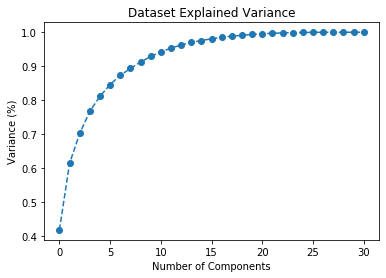

In [10]:
#Apply PCA
pca = PCA().fit(X_scaled)
#Plot the explained variance ratio v/s number of PCA features
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_),'o--')
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Dataset Explained Variance')
plt.show()

We want to select a low number of features (ideally less than 10). We can see that the increase in explained variance ratio of the PCA features becomes low and the explained variance crosses the 90% mark around 8-9 PCA top features . We will select the top 8 PCA features for our dataset and find the predictions according to the `linRegModels` and `SVR`.

In [11]:
pca = PCA(n_components=8)
X_pca = pca.fit_transform(X_scaled)
print("Explained Variance Ratio {}".format(100.0*np.sum(pca.explained_variance_ratio_)))

#Obtain MSE and predictions for the pca dataset on the linear regression models
Y_pred_linreg_pca,Y_pred_linreg_norm_pca,Y_pred_ridge_pca,Y_pred_ridge_norm_pca,MSELinRegPCA,MSELinRegPCANormalized,MSERidRegPCA,MSERidRegPCANormalized = \
    linRegModels(X_pca,Y_scaled,scaler_y,y)
#Obtain MSE and predictions for the pca dataset on the SVR model
Y_pred_svr_pca,MSESVRPCA = SVRModel(X_pca,Y_scaled,scaler_y,y)


Explained Variance Ratio 89.34186907790759


/home/harshv834/anaconda3/envs/ada/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/harshv834/anaconda3/envs/ada/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/harshv834/anaconda3/envs/ada/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/harshv834/anaconda3/envs/ada/lib/python3.7/site-packages/sklearn/model_select

Further, we apply the same PCA procedure to the polynomial features which we had earlier generated, i.e., we apply PCA to find the top variance components and use these PCA features to learn the best linear regression models.

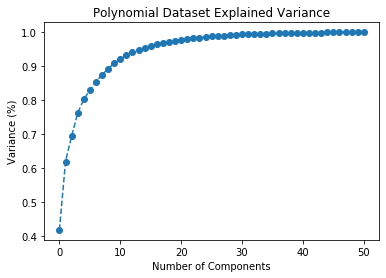

In [12]:
#Apply PCA
pca_poly = PCA().fit(X_poly)
#Plot the explained variance ratio v/s number of PCA features
plt.figure()
plt.plot(np.cumsum(pca_poly.explained_variance_ratio_),'o--')
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Polynomial Dataset Explained Variance')
plt.show()

Again the increase in explained variance becomes really low and the explained variance crosses the 90% mark around 8 features. For consistency, we will again keep the top 8 PCA features of the polynomial dataset and apply the linear regression models on them.

In [13]:
#Define PCA to select top 8 features
pca_poly = PCA(n_components = 8)
#Fit PCA model on given polynomial dataset
X_poly_pca = pca_poly.fit_transform(X_poly)
print("Explained Variance Ratio {}".format(100.0*np.sum(pca_poly.explained_variance_ratio_)))

#Obtain MSE and predictions for the polynomial pca dataset on the linear regression models
Y_pred_linreg_pca_poly,Y_pred_linreg_norm_pca_poly,Y_pred_ridge_pca_poly,Y_pred_ridge_norm_pca_poly,MSELinRegPolyPCA,MSELinRegPolyPCANormalized,\
    MSERidRegPolyPCA,MSERidRegPolyPCANormalized = linRegModels(X_poly_pca,Y_scaled,scaler_y,y)


Explained Variance Ratio 87.45194822358688


/home/harshv834/anaconda3/envs/ada/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/harshv834/anaconda3/envs/ada/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/harshv834/anaconda3/envs/ada/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/harshv834/anaconda3/envs/ada/lib/python3.7/site-packages/sklearn/model_select

The next approach which we apply is to separate the features into different categories, similar to the ones included in the actual HDI. The broad categories which we could find in our dataset were education, health,security and economy. In a later cell, we define the lists of features for these categories. This break up of features is the first step in creation of a personalized score.

In [14]:
#All columns
df.columns

Index(['State', 'HDI', 'awards_per_value', 'exp_award_value',
       'High_School_Fee', 'Elementary_School_Fee',
       'Colleges_universities_per_1000000', 'Junior_colleges_per_1000000',
       'Prof_schools_per_1000000', 'Intensive_top_230_score',
       'Life_Expectancy', 'mc_donalds_per_100k', 'eating_vegetables_daily',
       'diabetes_prevalence', 'alcohol_prevalence', 'mean_physical_activity',
       'mean_obesity', 'Homeless_per_100000', 'Violent_Crime',
       'Murder_and_Manslaughter', 'Rape', 'Robbery', 'Aggravated_Assoult',
       'Property_crime', 'Burglary', 'Theft', 'Motor_Vehicle_theft',
       'Per_capita_income', 'Price_2018_Studio', 'Price_2018_1br',
       'Price_2018_2br', 'Price_2018_3br', 'Price_2018_4br'],
      dtype='object')

In [15]:
#List of columns for each category
education_list = ['Colleges_universities_per_1000000', 'Junior_colleges_per_1000000', 
                  'Prof_schools_per_1000000', 'awards_per_value', 'exp_award_value', 'Intensive_top_230_score',
                  'High_School_Fee', 'Elementary_School_Fee']
health_list = ['Life_Expectancy', 'mc_donalds_per_100k', 'mean_obesity',
               'eating_vegetables_daily', 'eating_vegetables_daily', 'diabetes_prevalence', 'alcohol_prevalence',
               'mean_physical_activity', 'mean_obesity']
security_list = [ 'alcohol_prevalence', 'Homeless_per_100000', 'Violent_Crime',
                 'Murder_and_Manslaughter', 'Rape', 'Robbery', 'Aggravated_Assoult', 'Property_crime',
                 'Burglary', 'Theft', 'Motor_Vehicle_theft']
economy_list = ['Per_capita_income', 'mc_donalds_per_100k', 'Price_2018_Studio',
                'Price_2018_1br',  'Price_2018_2br', 'Price_2018_3br', 'Price_2018_4br', 'Homeless_per_100000',
                'Elementary_School_Fee', 'High_School_Fee']

In [16]:
#Creating a new dataframe for each category based on above lists
df_education = df[education_list]
df_health = df[health_list]
df_security = df[security_list]
df_economy = df[economy_list]

Now, we would like to represent each of these categories by a few representative features. We will use PCA to select the top-2 features per category.We will also select the top-2 features for these categories after polynomial augmentation. The basic procedure is repeated for each category. We first scale the data features to `[0,1]` then apply polynomial transformation, then fit a PCA model to the original and the polynomial features. 

In [17]:
#Define PCA for selecting 2 components
pca_comp = PCA(n_components=2)

In [18]:
#Scale data fro each category
cat_data_scaled = scaler_x.fit_transform(df_education)
#Obtain polynomial features for scaled data
cat_data_poly = polyfeat(cat_data_scaled)
#Select top2 PCA features from dataset
ed_feature = pca_comp.fit_transform(cat_data_scaled)
print("Explained Variance Ratio for Education {}".format(100.0*np.sum(pca_comp.explained_variance_ratio_)))
ed_feature_poly = pca_comp.fit_transform(cat_data_poly)
#Select top2 PCA features from the polynomial dataset
print("Explained Variance Ratio for Education Polynomial {}".format(100.0*np.sum(pca_comp.explained_variance_ratio_)))

cat_data_scaled = scaler_x.fit_transform(df_health)
cat_data_poly = polyfeat(cat_data_scaled)
health_feature = pca_comp.fit_transform(cat_data_scaled)
print("Explained Variance Ratio for Health {}".format(100.0*np.sum(pca_comp.explained_variance_ratio_)))
health_feature_poly = pca_comp.fit_transform(cat_data_poly)
print("Explained Variance Ratio for Health Polynomial {}".format(100.0*np.sum(pca_comp.explained_variance_ratio_)))

cat_data_scaled = scaler_x.fit_transform(df_security)
cat_data_poly = polyfeat(cat_data_scaled)
security_feature = pca_comp.fit_transform(cat_data_scaled)
print("Explained Variance Ratio for Security {}".format(100.0*np.sum(pca_comp.explained_variance_ratio_)))
security_feature_poly = pca_comp.fit_transform(cat_data_poly)
print("Explained Variance Ratio for Security Polynomial {}".format(100.0*np.sum(pca_comp.explained_variance_ratio_)))

cat_data_scaled = scaler_x.fit_transform(df_economy)
cat_data_poly = polyfeat(cat_data_scaled)
economy_feature = pca_comp.fit_transform(cat_data_scaled)
print("Explained Variance Ratio for Economy {}".format(100.0*np.sum(pca_comp.explained_variance_ratio_)))
economy_feature_poly = pca_comp.fit_transform(cat_data_poly)
print("Explained Variance Ratio for Economy Polynomial {}".format(100.0*np.sum(pca_comp.explained_variance_ratio_)))

Explained Variance Ratio for Education 62.43629643598405
Explained Variance Ratio for Education Polynomial 60.63424340019754
Explained Variance Ratio for Health 79.0778544219737
Explained Variance Ratio for Health Polynomial 76.37189248700494
Explained Variance Ratio for Security 73.20173188347201
Explained Variance Ratio for Security Polynomial 78.06684363670395
Explained Variance Ratio for Economy 85.34571192207694
Explained Variance Ratio for Economy Polynomial 84.25926215053319


We now stack these PCA features for each category into a single dataframe and label the features according to the category to which they belong. We obtain 2 dataframes of 8 features each for the categorical PCA features, one for the original dataset and one for the polynomial dataset.

In [19]:
#Stack together all category PCA features from the original dataset.
cat_data = pd.DataFrame(data = np.hstack((ed_feature,health_feature,security_feature,economy_feature)),\
                        columns = ["Education1","Education2","Health1","Health2","Security1","Security2","Economy1","Economy2"])
cat_data.head()

,Education1,Education2,Health1,Health2,Security1,Security2,Economy1,Economy2
0,-0.058614,0.518308,1.088307,-0.062581,0.433284,-0.366793,-0.598361,0.092652
1,0.439150,0.761389,-0.379155,-0.029016,0.872818,0.309678,0.261010,0.153895
2,-0.168710,-0.253282,-0.263936,-0.169542,0.258061,-0.066875,0.000732,-0.105762
3,-0.366289,0.119031,0.951237,0.061179,0.587030,-0.379195,-0.823032,0.261737
4,0.191689,-0.042024,-0.638627,-0.245933,0.198335,0.094236,1.512800,0.145417


In [20]:
#Stack together all category PCA features from the polynomial dataset
cat_data_poly = pd.DataFrame(data = np.hstack((ed_feature_poly,health_feature_poly,security_feature_poly,economy_feature_poly)),\
                        columns = ["Education1","Education2","Health1","Health2","Security1","Security2","Economy1","Economy2"])
cat_data_poly.head()

,Education1,Education2,Health1,Health2,Security1,Security2,Economy1,Economy2
0,-0.229575,0.738826,2.207961,-0.245896,0.384528,-0.772236,-1.018544,0.125706
1,0.303915,1.114270,-0.784043,-0.019102,1.909214,-0.452232,0.219950,0.373881
2,-0.241620,-0.358124,-0.602901,-0.371477,0.244499,-0.254109,-0.309678,-0.123173
3,-0.516248,0.118484,2.038143,0.182909,0.688669,-1.091436,-1.219261,0.307282
4,0.204182,0.078507,-1.210237,-0.535429,0.231954,-0.050517,3.400586,0.693676


We will use the two datasets defined above as the features for all our ML models. Thus, we find predictions on the linear regression models on both categorical features and categorical features after polynomial augmentation. Further, we will use the `SVRModel` with the categorical features

In [21]:
#Convert the per category PCA dataframes to numpy arrays
X_cat = cat_data.values
X_cat_poly = cat_data_poly.values

#Obtain MSE and predictions on linear regression models with category PCA features
Y_pred_linreg_all2pca,Y_pred_linreg_norm_all2pca,Y_pred_ridreg_all2pca,Y_pred_ridreg_norm_all2pca,MSELinRegAll2PCA,MSELinRegAll2PCANormalized,\
    MSERidRegAll2PCA,MSERidRegAll2PCANormalized = linRegModels(X_cat,Y_scaled,scaler_y,y)

#Obtain MSE and predictions on linear regression models with category PCA features with polynomial augmentation
Y_pred_linreg_all2pca_poly,Y_pred_linreg_norm_all2pca_poly,Y_pred_ridreg_all2pca_poly,Y_pred_ridreg_norm_all2pca_poly,MSELinRegAll2PCAPoly,\
    MSELinRegAll2PCAPolyNormalized,MSERidRegAll2PCAPoly,MSERidRegAll2PCAPolyNormalized = linRegModels(X_cat_poly,Y_scaled,scaler_y,y)

#Obtain MSE and predictions on SVR with category PCA features
Y_pred_SVR_all2pca,MSESVRAll2PCA = SVRModel(X_cat,Y_scaled,scaler_y,y)

/home/harshv834/anaconda3/envs/ada/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/harshv834/anaconda3/envs/ada/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/harshv834/anaconda3/envs/ada/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/harshv834/anaconda3/envs/ada/lib/python3.7/site-packages/sklearn/model_select

Note that the actual HDI score is obtained from the life expectancy, expected years of schooling and per capita income. We do not have the expected years of schooling explicitly defined in our dataset, however, we do have life expectancy and per capita income. We try to test the quality of our remaining features in predicting the HDI by removing the life expectancy and income from the set of input features. More specifically, we will remove these features from the category lists (income is in the economy list while life expectancy is in the health list). After removing these features from the categories, we perform a similar procedure as before ( original features (+ poly augmentation)-> pca -> ML models -> MSE and predictions). Also, since education and security lists aren't modified by this process, we perform the above procedure only for health and economy features

In [22]:
df.head()

,State,HDI,awards_per_value,exp_award_value,High_School_Fee,Elementary_School_Fee,Colleges_universities_per_1000000,Junior_colleges_per_1000000,Prof_schools_per_1000000,Intensive_top_230_score,...,Property_crime,Burglary,Theft,Motor_Vehicle_theft,Per_capita_income,Price_2018_Studio,Price_2018_1br,Price_2018_2br,Price_2018_3br,Price_2018_4br
1,alabama,0.882,19.514493,63013.173913,7718.0,6388.0,8.636111,7.402381,3.289947,75.257541,...,2947.8,700.5,2006.3,241.1,38215.0,605.416667,659.000000,800.666667,1069.666667,1244.333333
2,alaska,0.942,18.414286,141431.142857,6118.0,7544.0,8.087409,1.347901,2.695803,39.089142,...,3353.0,546.3,2394.7,412.1,54430.0,814.333333,930.500000,1190.333333,1682.166667,2019.500000
3,arizona,0.912,25.563492,47830.888889,17339.0,6283.0,6.636781,6.203947,6.059670,30.154070,...,2978.4,544.4,2168.1,265.8,39955.0,701.000000,828.000000,1046.000000,1512.333333,1754.416667
4,arkansas,0.882,21.970833,51132.479167,6680.0,4698.0,8.700750,8.700750,10.708616,32.125848,...,3268.6,795.5,2233.6,239.4,39171.0,524.666667,571.166667,721.416667,977.583333,1144.833333
5,california,0.934,22.771429,63022.202857,19317.0,11363.0,6.726112,4.866240,6.089169,78.063660,...,2553.0,479.8,1623.0,450.3,54800.0,1212.333333,1426.333333,1818.916667,2519.250000,2926.333333


In [23]:
#Store the income and life expectancy values
income = df[['Per_capita_income']].values
life_exp = df[['Life_Expectancy']].values

In [24]:
#Drop the life expectancy from health and scale 
cat_data_scaled = scaler_x.fit_transform(df_health.drop(columns=['Life_Expectancy']))
#Obtain polynomial features
cat_data_poly = polyfeat(cat_data_scaled)
#Find top2 PCA components
health_feature = pca_comp.fit_transform(cat_data_scaled)
print("Explained Variance Ratio for Health {}".format(100.0*np.sum(pca_comp.explained_variance_ratio_)))
#Find top2 PCA features for polynomial augmentation
health_feature_poly = pca_comp.fit_transform(cat_data_poly)
print("Explained Variance Ratio for Health Polynomial {}".format(100.0*np.sum(pca_comp.explained_variance_ratio_)))

#Drop per capita income from economy
cat_data_scaled = scaler_x.fit_transform(df_economy.drop(columns=['Per_capita_income']))
#Obtain polynomial features
cat_data_poly = polyfeat(cat_data_scaled)
#Find top2 PCA components
economy_feature = pca_comp.fit_transform(cat_data_scaled)
print("Explained Variance Ratio for Economy{}".format(100.0*np.sum(pca_comp.explained_variance_ratio_)))
#Find top2 PCA features for polynomial augmentation
economy_feature_poly = pca_comp.fit_transform(cat_data_poly)
print("Explained Variance Ratio for Economy Polynomial {}".format(100.0*np.sum(pca_comp.explained_variance_ratio_)))

Explained Variance Ratio for Health 79.2968469507313
Explained Variance Ratio for Health Polynomial 78.64262506487249
Explained Variance Ratio for Economy86.97585805081401
Explained Variance Ratio for Economy Polynomial 84.55002176227758


Now, we stack these new PCA features to obtain categorical features and categorical features for polynomial augmentation.

In [25]:
#Stack all category PCA features into a single dataframe
cat_data = pd.DataFrame(data = np.hstack((ed_feature,health_feature,security_feature,economy_feature)),\
                        columns = ["Education1","Education2","Health1","Health2","Security1","Security2","Economy1","Economy2"])
cat_data.head()

,Education1,Education2,Health1,Health2,Security1,Security2,Economy1,Economy2
0,-0.058614,0.518308,0.958057,-0.069199,0.433284,-0.366793,-0.551912,0.078982
1,0.439150,0.761389,-0.369344,0.009942,0.872818,0.309678,0.216761,0.165305
2,-0.168710,-0.253282,-0.281465,-0.155203,0.258061,-0.066875,0.053852,-0.145769
3,-0.366289,0.119031,0.861096,0.143015,0.587030,-0.379195,-0.791009,0.274313
4,0.191689,-0.042024,-0.569011,-0.347160,0.198335,0.094236,1.508984,0.092013


In [26]:
#stack all category PCA features from polynomial augmentation into single dataframe
cat_data_poly = pd.DataFrame(data = np.hstack((ed_feature_poly,health_feature_poly,security_feature_poly,economy_feature_poly)),\
                        columns = ["Education1","Education2","Health1","Health2","Security1","Security2","Economy1","Economy2"])
cat_data_poly.head()

,Education1,Education2,Health1,Health2,Security1,Security2,Economy1,Economy2
0,-0.229575,0.738826,2.031441,-0.253199,0.384528,-0.772236,-0.916601,0.140786
1,0.303915,1.114270,-0.764564,0.053603,1.909214,-0.452232,0.128979,0.343529
2,-0.241620,-0.358124,-0.658363,-0.276478,0.244499,-0.254109,-0.187715,-0.223471
3,-0.516248,0.118484,1.915518,0.230547,0.688669,-1.091436,-1.135626,0.408166
4,0.204182,0.078507,-1.101718,-0.548636,0.231954,-0.050517,3.328123,0.389112


Apply ML models on these new dataframes

In [27]:
#Convert the per category PCA dataframes to numpy arrays
X_cat = cat_data.values
X_cat_poly = cat_data_poly.values

#Obtain MSE and predictions on linear regression models with category PCA features
Y_pred_linreg_rob2pca,Y_pred_linreg_norm_rob2pca,Y_pred_ridreg_rob2pca,Y_pred_ridreg_norm_rob2pca,MSELinRegRob2PCA,MSELinRegRob2PCANormalized,\
    MSERidRegRob2PCA,MSERidRegRob2PCANormalized = linRegModels(X_cat,Y_scaled,scaler_y,y)

#Obtain MSE and predictions on linear regression models with category PCA features with polynomial augmentation
Y_pred_linreg_rob2pca_poly,Y_pred_linreg_norm_rob2pca_poly,Y_pred_ridreg_rob2pca_poly,Y_pred_ridreg_norm_rob2pca_poly,MSELinRegRob2PCAPoly,\
    MSELinRegRob2PCAPolyNormalized,MSERidRegRob2PCAPoly,MSERidRegRob2PCAPolyNormalized = linRegModels(X_cat_poly,Y_scaled,scaler_y,y)

#Obtain MSE and predictions on SVR with category PCA features
Y_pred_SVR_rob2pca,MSESVRRob2PCA = SVRModel(X_cat,Y_scaled,scaler_y,y)

/home/harshv834/anaconda3/envs/ada/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/harshv834/anaconda3/envs/ada/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/harshv834/anaconda3/envs/ada/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/harshv834/anaconda3/envs/ada/lib/python3.7/site-packages/sklearn/model_select

### Personalization : Weighting linear Regression
We define the following mathematical formulation for weighting features. Our first weighting function defined in `change_weights`. We apply this weigt functions to only the linear regression estimators on the 8 categorical features without income and life expectancy.
It takes an estimator fitted on the data, then changes the coeffcients according to our user supplied weights. The weights supplied to the function is a 4-size array containing real number weights for each of the 2 categories. We repeat each weight twice to get 8 weights. Then, each coefficient of the learned model is multiplied by the term `exp(weight - mean_weight)`, where `mean_weight` is the mean of all weights. Then, using these new weights, we predict the new personalized  HDI scores, which are scaled back using the original scaling for true HDI values. There are a few key points to consider here,

- Weighting Procedure downweighs (multiplies by a number less than 1) those features which have weights lower than the mean and upweighs (multiplies by a number greater than 1) for features with weights higher than the mean. When all weights are equal, each weight is 1, thus the actual predictor is used.

- The output HDI values are not always between 0.8-1 as was the case for the actual HDI values. This is especially observed when the weights differ by much. Thus when comparing these new "weighted HDI" values, we measure their relative values instead of their absolute values. Thus, the range of user-defined weights is set between 1-4 with a difference of 1. This can also easily be integrated with sliders.


We first split the data into training and test models so that our model does not overfit. As shown in previous analysis, we obtain a very small MSE for 5-fold cross validation, so our model should remain pretty accurate even when trained on this subset of the whole data.

In [404]:

#Split to obtain
X_train = X_cat[:40,:]
Y_train = Y_scaled[:40]
# Fit a linear regression model
linReg = LinearRegression()
linReg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [405]:
#Changing weights:
def change_weights(X,estimator,weights,scaling):
    #Obtain coefficients of estimator
    coef = estimator.coef_
    #Repeat weights
    weights_repeated = np.repeat(weights,2)
    #Obtain mean
    weights_mean = weights_repeated.mean()
    #Obtain new weights
    weights_new = np.exp(weights_repeated)/np.exp(weights_mean)
    #Change coefficients according to new weights
    coef_weighted = coef * weights_new.T
    estimator.coef_ = coef_weighted
    #Find predictions according to new weighted estimator 
    Y_pred_scaled= estimator.predict(X)
    #Scale the weighted predictions back to HDI range
    Y_pred = scaling.inverse_transform(Y_pred_scaled)
    #Reset the coefficients of estimator to original
    estimator.coef_ = coef
    return Y_pred

We will cover 4 corner cases with our weighing scheme to jusitfy its use. The 4 cases will be : high education, high economy, high security and high health. Basically, the category which is high has weight 4 and the rest have weight 0. Further, the correlation based weights make more sense for the linear regression models, so we will try to justify only their values.

In [406]:
#Define some weights
#Weight order : Education, Health, Security, Economy

#High economy weights
weights = np.array([1,1,1,4])
#Predictions from first method for high economy weights
Y_pred_weights = change_weights(X_train,linReg,weights,scaler_y)


Note that our results are not as expected because of the inherent correlation between features. Thus, even when we weigh one category, like health, we should ideally weigh all correlated features accordingly. We thus define a new weighting procedure, taking the correlations into account. Note that we can have a large correlation (around 0.6-0.7) for 2 features of different categories. The new weighting procedure multiplies the repeated weights defined by the user with the correlation matrix with absolute correlation values. Thus, even if a feature has a low weight defined by user, if its correlation is high to a high user-weighted feature, it will have a high weight. Taking absolute values allows for high negative correlated features to share weights.

In [407]:
cat_data.corr()

,Education1,Education2,Health1,Health2,Security1,Security2,Economy1,Economy2
Education1,1.000000e+00,-1.921571e-16,-5.786000e-01,-1.672241e-01,2.066962e-02,6.355019e-01,7.677660e-01,-1.600412e-01
Education2,-1.921571e-16,1.000000e+00,1.697260e-01,8.658979e-02,3.971826e-01,-4.843991e-02,-1.573304e-01,3.250814e-01
Health1,-5.786000e-01,1.697260e-01,1.000000e+00,-1.007563e-16,2.210588e-01,-7.125891e-01,-6.772694e-01,2.510677e-01
Health2,-1.672241e-01,8.658979e-02,-1.007563e-16,1.000000e+00,-2.221237e-01,3.680244e-01,-3.663845e-01,1.014294e-01
Security1,2.066962e-02,3.971826e-01,2.210588e-01,-2.221237e-01,1.000000e+00,-2.508321e-17,-1.476459e-03,5.423535e-01
Security2,6.355019e-01,-4.843991e-02,-7.125891e-01,3.680244e-01,-2.508321e-17,1.000000e+00,5.465798e-01,1.289812e-03
Economy1,7.677660e-01,-1.573304e-01,-6.772694e-01,-3.663845e-01,-1.476459e-03,5.465798e-01,1.000000e+00,9.228984e-17
Economy2,-1.600412e-01,3.250814e-01,2.510677e-01,1.014294e-01,5.423535e-01,1.289812e-03,9.228984e-17,1.000000e+00


In [408]:
#Store correlation
corr = np.abs(cat_data.corr().values)


In [409]:
#Changing weights according to correlation:
def change_weights_corr(X,estimator,weights,scaling,corr):
    #Obtain coefficients of estimator
    coef = estimator.coef_
    #Repeat weights
    weights_repeated = np.repeat(weights,2)
    #Multiply by correlation matrix
    weights_new = corr @ weights_repeated
    #Obtain mean
    weights_mean = weights_new.mean()
    #Obtain new weights
    weights_new = np.exp(weights_new)/np.exp(weights_mean).reshape(-1,1)
    #Change coefficients according to new weights
    coef_weighted = coef * weights_new
    estimator.coef_ = coef_weighted
    #Find predictions according to new weighted estimator 
    Y_pred_scaled= estimator.predict(X)
    
    #Scale the weighted predictions back to HDI range
    Y_pred = scaling.inverse_transform(Y_pred_scaled)
    #Reset the coefficients of estimator to original
    estimator.coef_ = coef
    return Y_pred

In [410]:
#Obtain new weighted predictions for high economy
Y_pred_weights_corr = change_weights_corr(X_train,linReg,weights,scaler_y,corr)

We will now zip together the predicted high economy HDI values(using correlation based weighing) with the state names, the true HDI values and the income into a dataframe. Note that in the calculation of PCA features which have been used in our weighing scheme, we did not use the income or life expectancy values. Thus, high economy features should in general have high incomes, if our model works correctly.

In [411]:
#Zip the given variables into a dataframe
hdi_income_df = pd.DataFrame(data = zip(Y_pred_weights_corr.reshape(-1,),States,income[:40].reshape(-1,),y[:40]),\
                             columns = ['High_economy_HDI','State','income','True HDI'])

In [412]:
# Sort by the high economy hdi
hdi_income_df.sort_values("High_economy_HDI")

,High_economy_HDI,State,income,True HDI
24,0.817035,mississippi,34752.0,0.867
3,0.817421,arkansas,39171.0,0.882
0,0.833066,alabama,38215.0,0.882
17,0.835109,kentucky,38075.0,0.885
18,0.838594,louisiana,42055.0,0.890
36,0.838799,oklahoma,42008.0,0.898
14,0.847381,indiana,42383.0,0.910
35,0.861653,ohio,43579.0,0.917
22,0.870667,michigan,42979.0,0.916
16,0.872170,kansas,46057.0,0.927


The highest income is for district of columbia and so it features on the top of the list. Further, states with the 3 lowest incomes have the 3 lowest economy based HDI values. The per capita income, in general, increases with increase in our weighted HDI value, with a few exceptions. The exceptions arise because inspite of our weighing, we are modifying the model used for predicting the HDI values. Thus, some states which have lower incomes but better conditions for other factors affecting HDI perform better. Also, the weighing procedure used here takes correlations into account, so even though we want economy high HDI, since health and economy features are strongly correlated, more healthy states do pop up. Further, our economy features are not the same as the per capita income but offer a more encompassing view using rent rates and even McD prices.
For example, consider the case of Hawaii. It has a really small per capita income to feature in the top-5 for economy weighted HDI. But, it has the highest life expectancy among all states, so based on both high correlation of health and economy and its overall high HDI, its position can be justified.
District of columbia is our best example. Although it is a fairly good state to live in based on true HDI, its highest income propels it to the top when economy matters. Later, we will see that the effect of correlations in our weighing procedure cause district of columbia to be at the top in all the 4 corner cases. 

For the high health HDI states, we will use the life expectancy as a yardstick to verify our claims. 

In [413]:
#Corner case 2 : High health feaures
#Define high health weights
weights = np.array([1,4,1,1])
#Predictions using first weighing scheme
Y_pred_weights = change_weights(X_train,linReg,weights,scaler_y)
#Predictions using correlation based weighing scheme
Y_pred_weights_corr = change_weights_corr(X_train,linReg,weights,scaler_y,corr)
#Zipping life expectancy, high health HDI , true HDI and States into a dataframe
hdi_health_df = pd.DataFrame(data = zip(Y_pred_weights_corr.reshape(-1,),States,life_exp[:40].reshape(-1,),y[:40]),columns = ['High_health_HDI','State'\
                                                                                                                            ,'Life_Expectancy','True HDI'])
#Sort by high health HDI values
hdi_health_df.sort_values("High_health_HDI")

,High_health_HDI,State,Life_Expectancy,True HDI
24,0.759606,mississippi,75.026941,0.867
3,0.785383,arkansas,75.626900,0.882
36,0.794995,oklahoma,75.870333,0.898
0,0.795381,alabama,74.813987,0.882
17,0.810754,kentucky,75.564402,0.885
18,0.818020,louisiana,75.372675,0.890
14,0.831090,indiana,76.765489,0.910
33,0.836693,north carolina,77.396905,0.909
31,0.849303,new mexico,78.546753,0.905
35,0.849840,ohio,76.567100,0.917


There is a clear trend between life expectancy values and our health HDI values with life expectancy increasing as health HDI increases. District of columbia still remains top even with not the best life expectancy, but the cause of this is its high wealth and the high correlation of wealth and health. Hawaii which was at 4th position when considering economy now jumps to the 2nd position based on health. Further, 4 out of  6 states with life expectancy higher than 80 years are in top  health HDI values and the 6 states with the lowest life expectancies are in the bottom 6 of our health HDI values.

For our next 2 corner cases, education and security, we do not have concrete outside metrics like income or life expectancies to justify our scores. We will thus use empirical surveys and lists using official statistics to verify our claims.

In [414]:
#Corner case 3 : high education HDI
#Define weights for high education 
weights = np.array([4,1,1,1])
#Predict high education hdi using normal weighing scheme
Y_pred_weights = change_weights(X_train,linReg,weights,scaler_y)
#Predict high education hdi using correlation based weighing schemes
Y_pred_weights_corr = change_weights_corr(X_train,linReg,weights,scaler_y,corr)
#Zip true hdi, State names and high education hdi into a dataframe
hdi_education_df = pd.DataFrame(data = zip(Y_pred_weights_corr.reshape(-1,),States,y[:40]),columns = ['High_education_HDI','State',\
                                                                                                                                 'True HDI'])
#Sort by high education hdi values
hdi_education_df.sort_values("High_education_HDI")

,High_education_HDI,State,True HDI
24,0.838009,mississippi,0.867
3,0.840066,arkansas,0.882
36,0.851352,oklahoma,0.898
17,0.853575,kentucky,0.885
0,0.853579,alabama,0.882
18,0.857901,louisiana,0.890
14,0.858601,indiana,0.910
35,0.873499,ohio,0.917
25,0.878643,missouri,0.910
15,0.879271,iowa,0.932


We will use the following index from USNews as our index for ranking.
https://www.usnews.com/news/best-states/rankings/education

Note that the usual suspects topping this list are Columbia, Hawaii and california because of correlations of other categories with education. However, a state like Florida which is high in education ranking moves many positions and ends up in the top 10 while it did not feature there when economy or health were highly weighted.

In [415]:
#Corner case 4: High security
#Define weights for high security
weights = np.array([1,1,4,1])
#Apply weights for high security using normal weighing scheme
Y_pred_weights = change_weights(X_train,linReg,weights,scaler_y)
#Apply weights for high security using correlation based weighing scheme
Y_pred_weights_corr = change_weights_corr(X_train,linReg,weights,scaler_y,corr)
#Zip state names, true hdi and high security hdi into a single dataframe
hdi_security_df = pd.DataFrame(data = zip(Y_pred_weights_corr.reshape(-1,),States,y[:40]),columns = ['High_security_HDI','State',\
                                                                                                                                 'True HDI'])
#Sort by high security HDI
hdi_security_df.sort_values("High_security_HDI")

,High_security_HDI,State,True HDI
24,0.816954,mississippi,0.867
3,0.840090,arkansas,0.882
0,0.841617,alabama,0.882
36,0.849500,oklahoma,0.898
18,0.851135,louisiana,0.890
17,0.867419,kentucky,0.885
33,0.869717,north carolina,0.909
14,0.873747,indiana,0.910
31,0.879526,new mexico,0.905
10,0.881536,georgia,0.906


We will again use a USNews ranking as our yardstick : https://www.usnews.com/news/best-states/rankings/crime-and-corrections/public-safety
Most of the states in the above ranking do not have the same positions in our high security hdi values. One of the main reasons for this is the actual HDI which depends on life expectancy, mean years of schooling and per capita income only. Thus, security in itself should not have a very overt impact even on our modified scale since it was initially trained to predict the HDI. This might be the reason why the top and the bottom states in our high security HDI remain unaffected. However, there are small variations which can be used to justify our methods. The best example for this is Maine, which enters into our top 10 according to high security hdi but it had never featured there in our previous corner cases. Further, Maine ranks highly in the USNews list for safest states too.    

# Visualization:

First, we will compare the different models:

In [35]:
withoutNormalization = {'MSELinReg': MSELinReg, 'MSELinRegPoly': MSELinRegPoly, 'MSERidReg': MSERidReg,\
                        'MSERidRegPoly': MSERidRegPoly, 'MSELinRegPCA': MSELinRegPCA, 'MSELinRegPolyPCA': MSELinRegPolyPCA,\
                        'MSERidRegPCA': MSERidRegPCA, 'MSERidRegPolyPCA': MSERidRegPolyPCA}

withNormalization = {'MSELinRegNormalized': MSELinRegNormalized, 'MSELinRegPolyNormalized': MSELinRegPolyNormalized,\
                        'MSERidRegNormalized': MSERidRegNormalized, 'MSERidRegPolyNormalized': MSERidRegPolyNormalized,\
                        'MSELinRegPCANormalized': MSELinRegPCANormalized, 'MSELinRegPolyPCANormalized': MSELinRegPolyPCANormalized,\
                        'MSERidRegPCANormalized': MSERidRegPCANormalized, 'MSERidRegPolyPCANormalized': MSERidRegPolyPCANormalized}

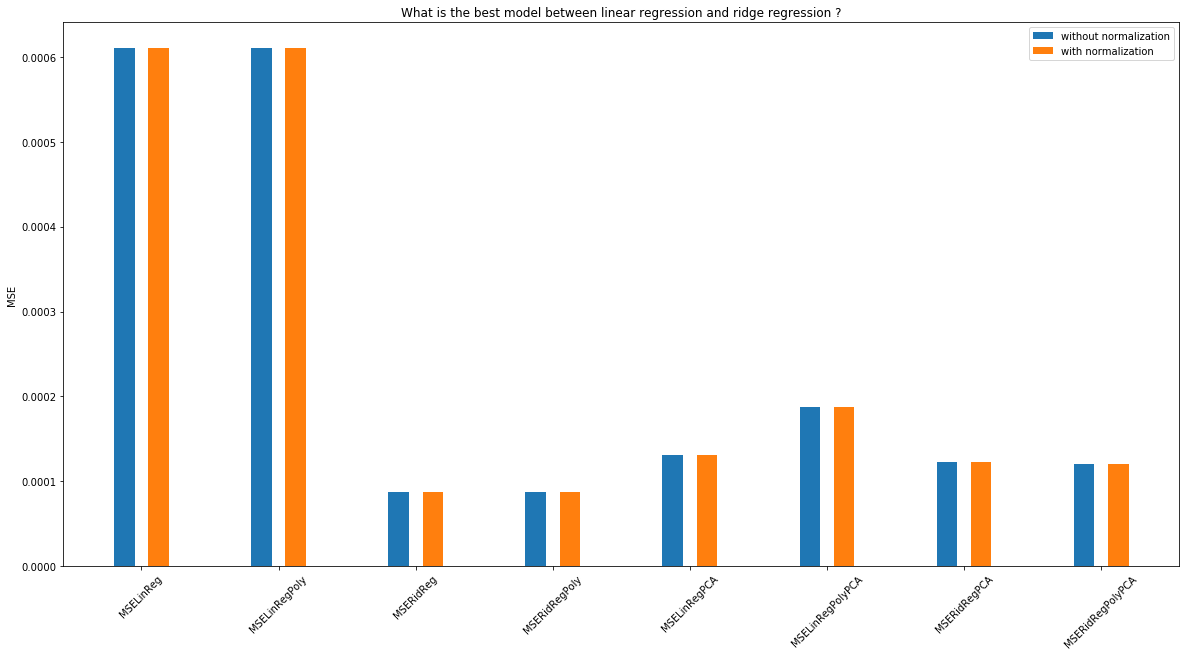

In [36]:
#here we compare linear regression and ridge regression (with/without normalization and with/without PCA)
plt.figure(figsize=(20,10))
plt.title("What is the best model between linear regression and ridge regression ?")
plt.ylabel("MSE")
barWidth = 0.25
r1 = np.arange(len(withoutNormalization))
r2 = [x + barWidth for x in r1]
plt.bar(r1, withoutNormalization.values(), width=0.15) 
plt.bar(r2, withNormalization.values(), width=0.15) 
plt.xticks([r + barWidth/2 for r in range(len(withoutNormalization))], withoutNormalization, 
           rotation=45)
plt.gca().legend(('without normalization', 'with normalization'))
plt.show()

First of all, we directly see that ridge regression with polynomial expansion gives the lowest mean square error. The second lowest MSE is ~3.64 times higher!  
It is important to notice that even with PCA applied, ridge regression with polynomial expansion still gives one of the best results (among the one with PCA applied) with an MSE of 0.00010719844617705647 while the best model is of 0.00010135941361386338 so it's MSE is only ~1.06 times higher thant the best one.  

So, since ridge regression with polynomial expansion gives the best results and is also robust when we remove some information (with PCA), we would prefere this model rather than linear regression or other variant of ridge regression in our prediction task!

From the bar plot, we can see that in most of the cases, the 'normalize' parameter is insignificant. The only exception is when we use linear regression with polynomial expansion. We can deduce that polynomial expansion and normalization shouldn't be combined in a linear regression model.    
Another strange observation is the fact that linear regression **with PCA** gives better results than **without PCA**. Our guess about this is that the dataset is noisy and then not suitable for a model designed for linearly separable data. The PCA removes part of the noise by combining some original features, making the dataset more separable and thus linear regression, then gives better performances.


In [37]:
#here we compare ridge regression with SVR
print("Ridge regression with polynomial expansion has an MSE of "+str(MSERidRegPoly) +" while SVR has an MSE of "+str(MSESVR)+\
      ", making his loss "+str(MSESVR/MSERidRegPoly)+" times bigger. We will thus prefer ridge regression with polynomial expansion.")


Ridge regression with polynomial expansion has an MSE of 8.74590967679166e-05 while SVR has an MSE of 0.00011105068961837442, making his loss 1.2697443001619488 times bigger. We will thus prefer ridge regression with polynomial expansion.


Now that we have choose our model, we will look at its prediction.

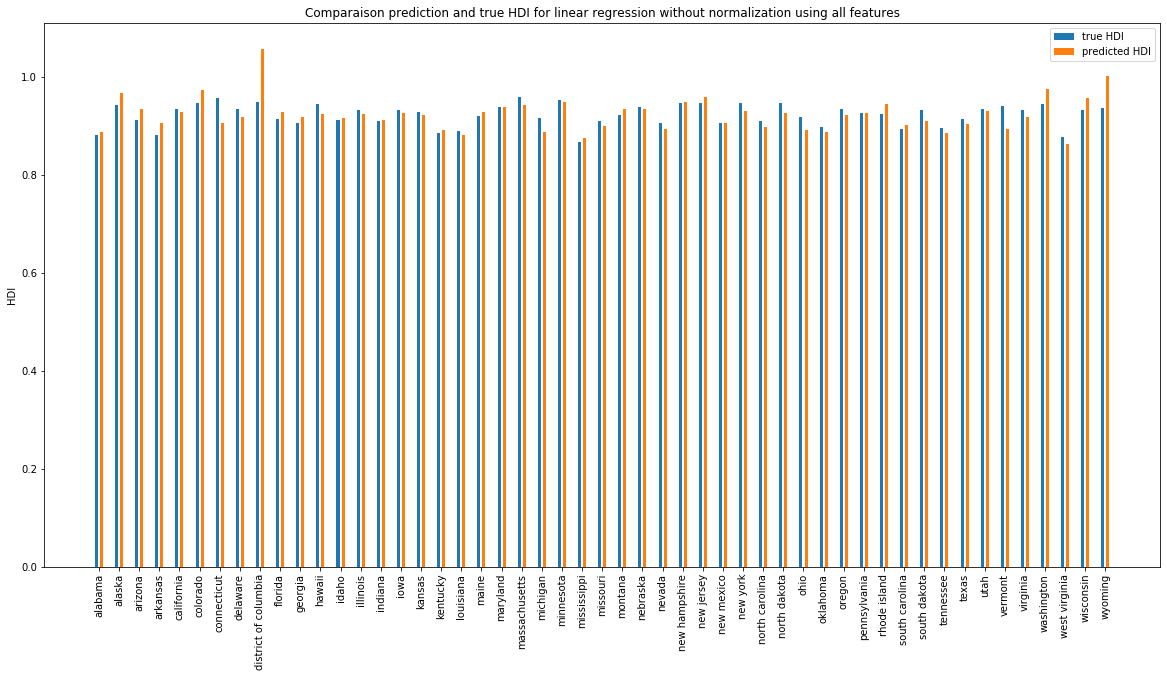

In [38]:
#here we compare true HDI with predicted HDI
plt.figure(figsize=(20,10))
plt.title("Comparaison prediction and true HDI for linear regression without normalization using all features")
plt.ylabel("HDI")
barWidth = 0.25
r1 = np.arange(len(Y_pred_linreg))
r2 = [x + barWidth for x in r1]
plt.bar(r1, y, width=0.15) 
plt.bar(r2, Y_pred_linreg.reshape(len(Y_pred_linreg)), width=0.15) 
plt.xticks([r + barWidth/2 for r in range(len(Y_pred_linreg))], df.State, 
           rotation='vertical')
plt.gca().legend(('true HDI', 'predicted HDI'))
plt.show()

We can see that the prediction is good. But are there some outliers (i.e. some states with really bad prediction) ?

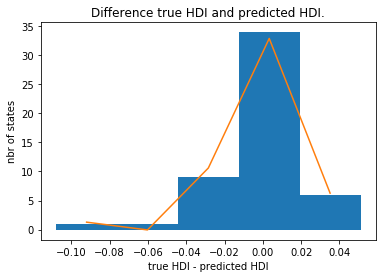

The mean of the difference is of : -0.0004586943872642329
The standard devition is of : 0.024698924248181976


In [39]:
from scipy.interpolate import UnivariateSpline

differenceTable = y - Y_pred_linreg.reshape(len(Y_pred_linreg))

plt.title("Difference true HDI and predicted HDI.")
plt.xlabel("true HDI - predicted HDI")
plt.ylabel("nbr of states")
plt.hist(differenceTable, bins=5)
p, x = np.histogram(differenceTable, bins=5)
x = x[:-1] + (x[1] - x[0])/2   # convert bin edges to centers
f = UnivariateSpline(x, p, s=5)
plt.plot(x, f(x))
plt.show()
print("The mean of the difference is of : "+str(differenceTable.mean()))
print("The standard devition is of : "+str(np.std(differenceTable)))

We can see that there are no outliers and that the difference repartition is centered around '0' which is good since otherwise it would mean that there is a bias in our prediction.

# Visualize results when we apply 2 PCA on each classes

In [40]:
MSEDict = {'Lin. reg.': MSELinRegAll2PCA, 'Normalized lin. reg.': MSELinRegAll2PCANormalized,\
           'Lin. reg. with poly. expans.': MSELinRegAll2PCAPoly, 'Normalized lin. reg. with poly. expans.': MSELinRegAll2PCAPolyNormalized,\
          'Rid. reg.': MSERidRegAll2PCA, 'Normalized rig. reg.': MSERidRegAll2PCANormalized, 'Rid. reg. with poly. expans.': MSERidRegAll2PCAPoly,\
          'Normalized rid. reg. with poly. expans.': MSERidRegAll2PCAPolyNormalized, 'SVR': MSESVRAll2PCA}
MSEDict = sorted(MSEDict.items(), key=lambda x: x[1])
MSEDict

[('SVR', 0.00014155626993653635),
 ('Rid. reg.', 0.00014198825277509744),
 ('Normalized rig. reg.', 0.00014198825277509744),
 ('Lin. reg. with poly. expans.', 0.00015505064579739386),
 ('Normalized lin. reg. with poly. expans.', 0.00015505064579739438),
 ('Rid. reg. with poly. expans.', 0.00015616255588324682),
 ('Normalized rid. reg. with poly. expans.', 0.00015616255588324682),
 ('Normalized lin. reg.', 0.0001602276093586567),
 ('Lin. reg.', 0.00016022760935865702)]

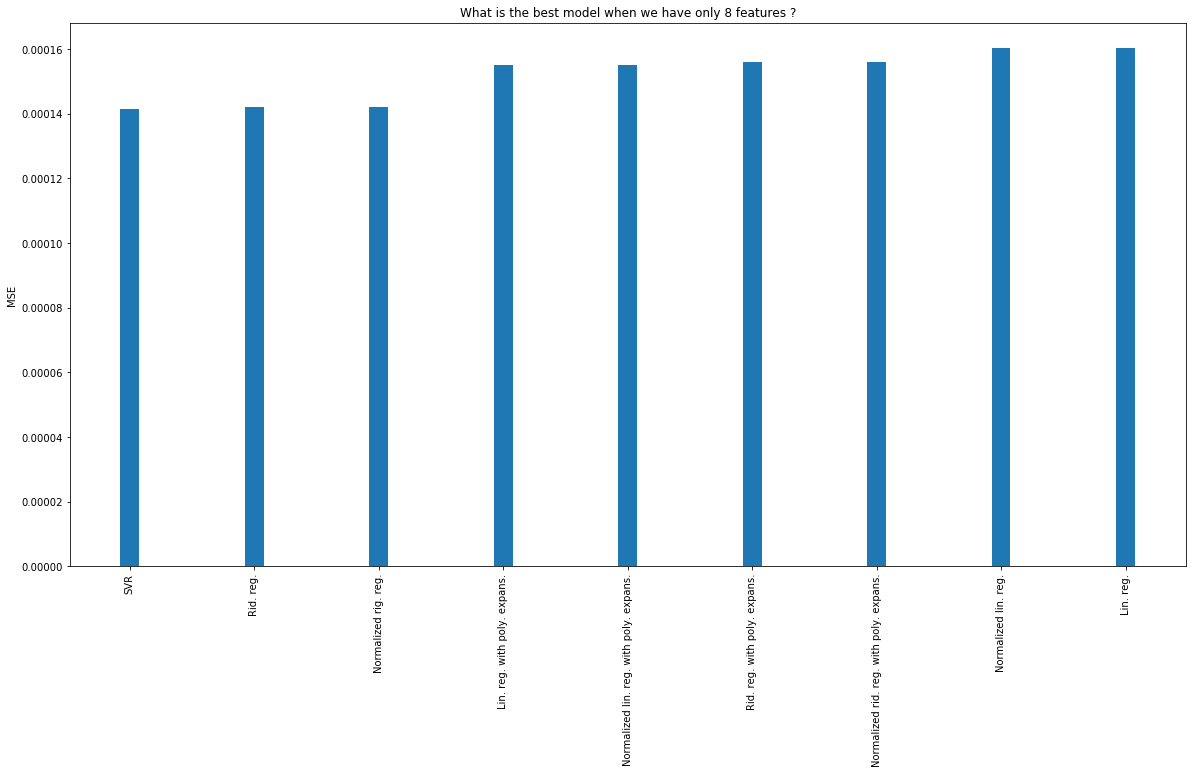

In [41]:
#here we compare the different model results when we only keep 8 features (i.e. 2 PCA for each classes)
plt.figure(figsize=(20,10))
plt.title("What is the best model when we have only 8 features ?")
plt.ylabel("MSE")
barWidth = 0.25
r1 = np.arange(len(MSEDict))
plt.bar(r1, [MSE for _, MSE in MSEDict], width=0.15) 
plt.xticks([r for r in range(len(MSEDict))], [name for name, _ in MSEDict], 
           rotation='vertical')
plt.show()

We can see that ridge regression with polynomial expansion still has the lowest MSE.  
We can also notice from the bar plot that SVR and ridge regression have almost the same MSE while linear regression always gives bigger MSE.  

The fact that linear regression have bad results gives a sign about the fact that the samples are not linearly separable.

We will once again have a closer look at the best model (i.e. ridge regression with polynomial expansion):

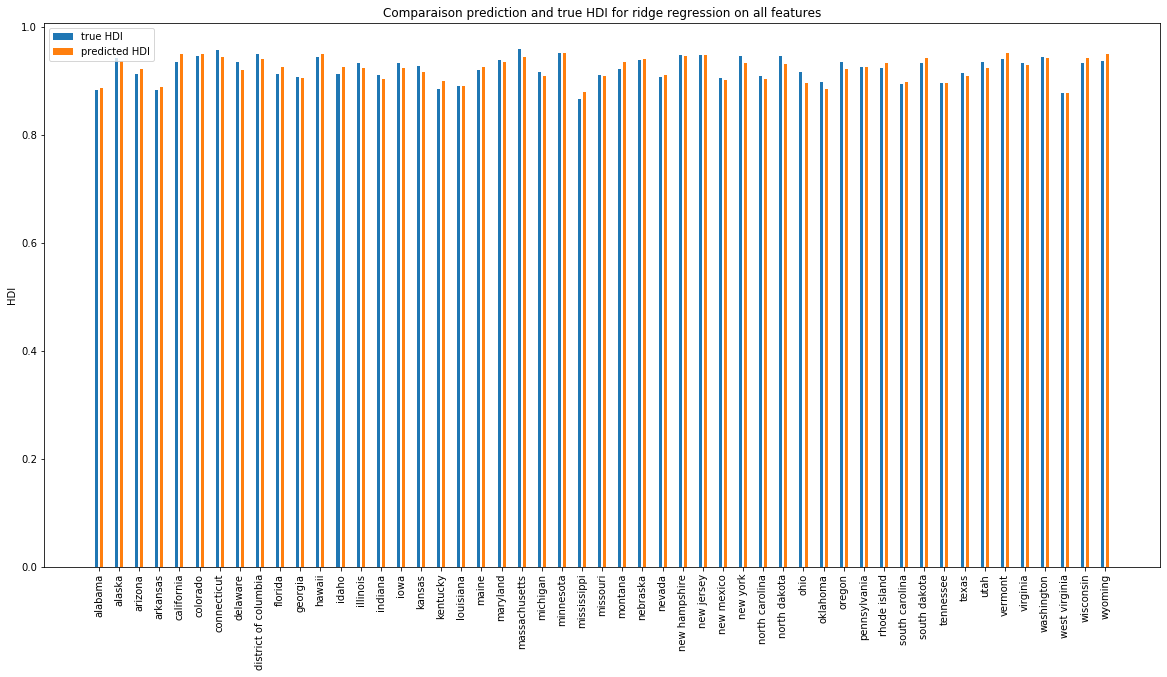

In [42]:

#here we compare true HDI with predicted HDI
plt.figure(figsize=(20,10))
plt.title("Comparaison prediction and true HDI for ridge regression on all features")
plt.ylabel("HDI")
barWidth = 0.25
r1 = np.arange(len(Y_pred_ridge))
r2 = [x + barWidth for x in r1]
plt.bar(r1, y, width=0.15) 
plt.bar(r2, Y_pred_ridge.reshape(len(Y_pred_ridge)), width=0.15) 
plt.xticks([r + barWidth/2 for r in range(len(Y_pred_ridge))], df.State, 
           rotation='vertical')
plt.gca().legend(('true HDI', 'predicted HDI'))
plt.show()

We can see that the prediction is not as accurate as with the full 31 features but given that here there are only 8 features, the prediction is still close to the real HDI.  

Are there some outliers (i.e. some states with really bad prediction) ?

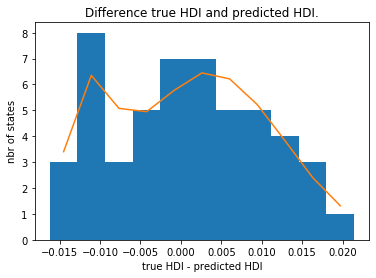

The mean of the difference is of : 0.0006492540329665097
The standard devition is of : 0.00932939258304598


In [43]:
differenceTable = y - Y_pred_ridge.reshape(len(Y_pred_ridge))

plt.title("Difference true HDI and predicted HDI.")
plt.xlabel("true HDI - predicted HDI")
plt.ylabel("nbr of states")
plt.hist(differenceTable, bins=11)
p, x = np.histogram(differenceTable, bins=11)
x = x[:-1] + (x[1] - x[0])/2   # convert bin edges to centers
f = UnivariateSpline(x, p, s=11)
plt.plot(x, f(x))
plt.show()
print("The mean of the difference is of : "+str(differenceTable.mean()))
print("The standard devition is of : "+str(np.std(differenceTable)))

We can see that the mean of the difference is stil near '0' which is good.  
We can notice that the standard deviation increased when we applied PCA. It went from ~0.002734 to ~0.010325 (i.e. increased ~3.8 times. Since PCA remove some info from the input, this lost of precision was expected and explains the higher loss of ridge regression with polynomial expansion when we apply PCA.